<h1>I. ĐỌC DỮ LIỆU<h1>

In [1]:
import pandas as pd
import numpy as np 

In [2]:
dataset = pd.read_csv("zoo.csv")

In [3]:
dataset.shape

(101, 18)

In [4]:
dataset.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [5]:
dataset.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


<h1>II. TIỀN SỬ LÝ DỮ LIỆU (PREPROCESS).<h1>
<h2>2.1. Kiểm tra thiếu dữ liệu (missing data)<h2>

In [6]:
dataset.isnull().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

Vậy không có dữ liệu nào bị thiếu

<h2>2.2. Kiểm tra dữ liệu bị trùng (duplicated)<h2>

In [7]:
#Đếm số tên động vật (cột animal_name) bị trùng
duplicates = dataset.duplicated(['animal_name']).sum()
print(duplicates)

1


Vậy là có 1 tên động vật bị trùng

In [8]:
duplicates = dataset.animal_name.value_counts()
duplicates[duplicates > 1]

frog    2
Name: animal_name, dtype: int64

Vậy có 2 con vật có chung tên "frog"

In [9]:
frog = dataset.loc[dataset["animal_name"]=="frog"]
frog

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


Ta thấy, điểm khác biệt duy nhất giữa 2 con 'frog' là thuộc tính 'venomous'.<br>
Vậy, ta sẽ đổi tên một con thành 'venomous_frog'

In [10]:
#đổi tên một con 'frog' thành 'venomous_frog'
dataset["animal_name"][(dataset.venomous == 1) & (dataset.animal_name == "frog")] = "venomous_frog"

<ipython-input-10-3693c681610a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["animal_name"][(dataset.venomous == 1) & (dataset.animal_name == "frog")] = "venomous_frog"


<h2>2.3. Check data type & visualize data<h2>

In [11]:
class_dataset = pd.read_csv("class.csv")
class_dataset.shape


(7, 4)

In [12]:
class_dataset.head()

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"


In [13]:
p = pd.DataFrame(class_dataset, columns=['Class_Type', 'Number_Of_Animal_Species_In_Class'])
p.columns = ["Type", "Number"]
p['Percent'] = (p["Number"]/(p["Number"].sum())) * 100
p.sort_values(by=['Number'])
p

,Type,Number,Percent
0,Mammal,41,40.594059
1,Bird,20,19.801980
2,Reptile,5,4.950495
3,Fish,13,12.871287
4,Amphibian,4,3.960396
5,Bug,8,7.920792
6,Invertebrate,10,9.900990


<AxesSubplot:xlabel='Class_Type', ylabel='Number_Of_Animal_Species_In_Class'>

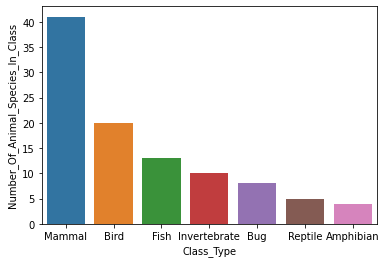

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt 

sns.barplot(x='Class_Type', y='Number_Of_Animal_Species_In_Class', data=class_dataset, order=class_dataset.sort_values('Number_Of_Animal_Species_In_Class', ascending = False).Class_Type)

# sns.countplot(class_dataset['Class_Type'], order=class_dataset["Class_Type"])
# plt.show()

In [15]:
zoo_full = dataset.merge(class_dataset, how='left', left_on='class_type', right_on='Class_Number')
zoo_full.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,fins,legs,tail,domestic,catsize,class_type,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,antelope,1,0,0,1,0,0,0,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,1,0,0,4,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
3,bear,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
4,boar,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."


In [16]:
#Set feature and target
feature = ['hair','feathers','eggs','milk','airborne','aquatic','predator','toothed',
                 'backbone','breathes','venomous','fins','legs','tail','domestic']
zoo_full["classtype"] = 1


In [17]:
# for i in feature:
#     g = sns.FacetGrid(zoo_full, col="Class_Type", row=i, hue="Class_Type")
#     g.map(plt.hist,"classtype")
#     g.set(xticklabels=[])
#     plt.subplots_adjust(top=0.9)
#     g.fig.suptitle(i)

<AxesSubplot:ylabel='Class_Type'>

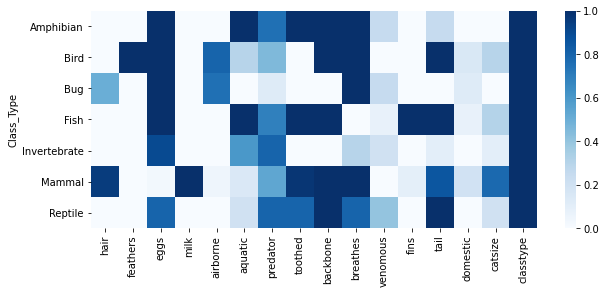

In [18]:
heat = zoo_full.groupby(by='Class_Type').mean()
heat2 = heat.drop(columns=['class_type','Class_Number','Number_Of_Animal_Species_In_Class','legs'], axis=1)
plt.subplots(figsize=(10,4))
sns.heatmap(heat2, cmap="Blues")

<AxesSubplot:xlabel='Class_Type', ylabel='legs'>

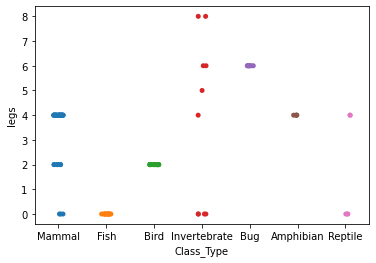

In [19]:
sns.stripplot(x=zoo_full['Class_Type'], y=zoo_full['legs'])

<h2>2.4. Train-test split<h2>

In [20]:
X = dataset[feature]
y = dataset['class_type']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1, stratify=y)


<h1>III. DECISION TREE CLASSIFICATION<h1>

In [21]:
from sklearn.tree import DecisionTreeClassifier

decisionTree = DecisionTreeClassifier(random_state = 0,criterion='gini')
decisionTree.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
from sklearn.model_selection import *
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics

pred = decisionTree.predict(X_test)
print('Accuracy of classifier on test set: {:.2f}'
     .format(decisionTree.score(X_test, y_test)))
print()
print(confusion_matrix(y_test, pred))
print()
print(classification_report(y_test, pred))

Accuracy of classifier on test set: 0.96

[[21  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0]
 [ 0  0  2  0  0  0  0]
 [ 0  0  0  7  0  0  0]
 [ 0  0  1  0  1  0  0]
 [ 0  0  0  0  0  3  1]
 [ 0  0  0  0  0  0  5]]

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        10
           3       0.67      1.00      0.80         2
           4       1.00      1.00      1.00         7
           5       1.00      0.50      0.67         2
           6       1.00      0.75      0.86         4
           7       0.83      1.00      0.91         5

    accuracy                           0.96        51
   macro avg       0.93      0.89      0.89        51
weighted avg       0.97      0.96      0.96        51



In [22]:
zoo_full[['class_type', 'Class_Type']].drop_duplicates().sort_values(by='class_type')

,class_type,Class_Type
0,1,Mammal
11,2,Bird
62,3,Reptile
2,4,Fish
25,5,Amphibian
24,6,Bug
13,7,Invertebrate


In [23]:
importance = pd.DataFrame(decisionTree.feature_importances_)
feat = pd.DataFrame(feature)

feat_imp = pd.concat([feat, importance], axis=1, ignore_index=True)
feat_imp.columns = ["Features", "Importance"]
feat_imp.sort_values(by="Importance", ascending=False, inplace=True)

feat_imp


,Features,Importance
3,milk,0.380454
1,feathers,0.213787
11,fins,0.140239
8,backbone,0.086346
6,predator,0.069808
13,tail,0.062827
12,legs,0.046539
0,hair,0.000000
2,eggs,0.000000
4,airborne,0.000000


In [24]:
feat.columns=['Features']
feat

,Features
0,hair
1,feathers
2,eggs
3,milk
4,airborne
5,aquatic
6,predator
7,toothed
8,backbone
9,breathes


In [25]:
from sklearn import tree

text_representation = tree.export_text(decisionTree)
print(text_representation)

|--- feature_3 <= 0.50
|   |--- feature_1 <= 0.50
|   |   |--- feature_11 <= 0.50
|   |   |   |--- feature_8 <= 0.50
|   |   |   |   |--- feature_12 <= 3.00
|   |   |   |   |   |--- class: 7
|   |   |   |   |--- feature_12 >  3.00
|   |   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |--- feature_6 >  0.50
|   |   |   |   |   |   |--- class: 7
|   |   |   |--- feature_8 >  0.50
|   |   |   |   |--- feature_13 <= 0.50
|   |   |   |   |   |--- class: 5
|   |   |   |   |--- feature_13 >  0.50
|   |   |   |   |   |--- class: 3
|   |   |--- feature_11 >  0.50
|   |   |   |--- class: 4
|   |--- feature_1 >  0.50
|   |   |--- class: 2
|--- feature_3 >  0.50
|   |--- class: 1



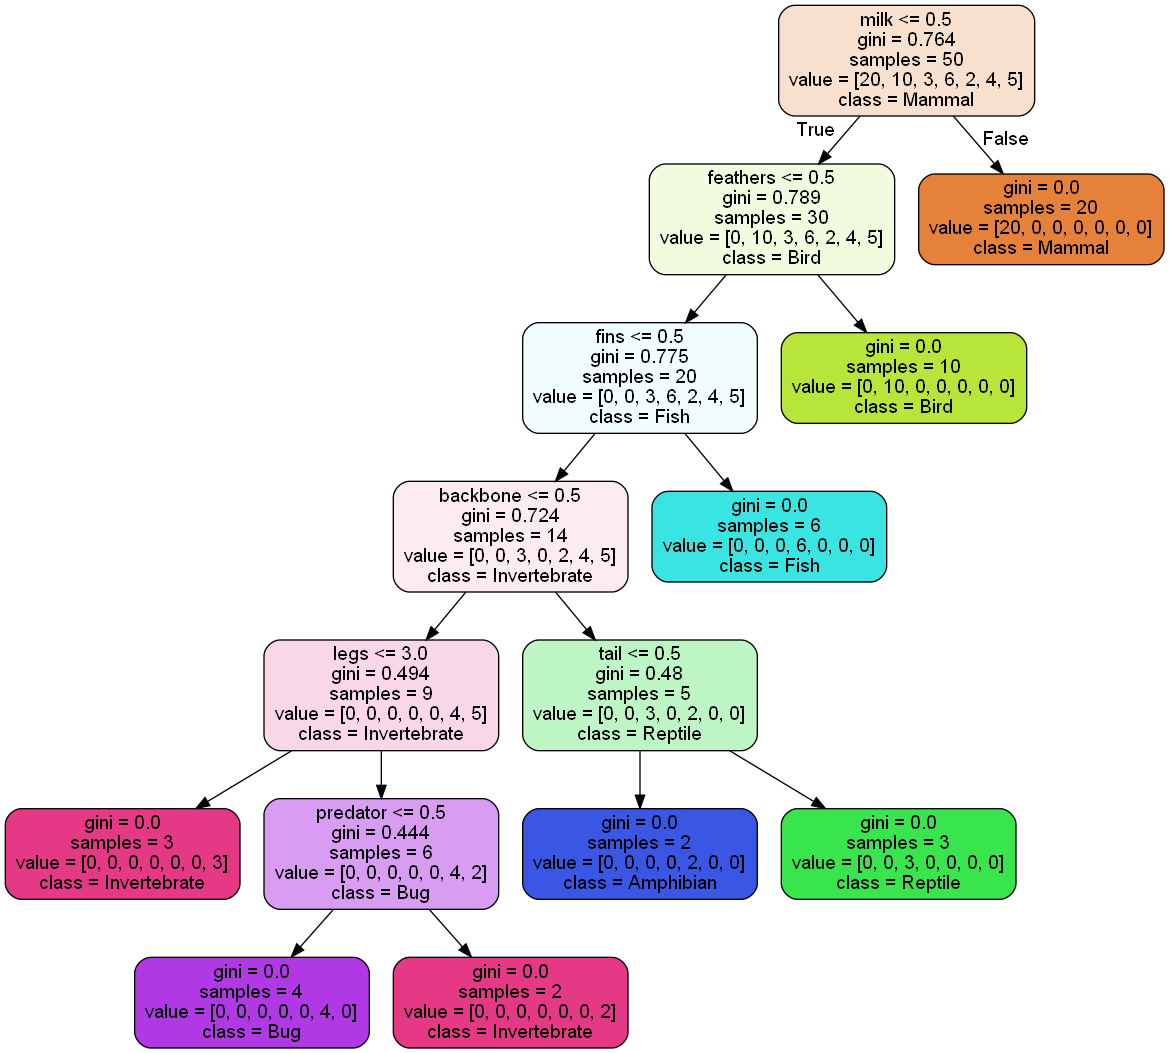

In [26]:
from sklearn.tree import export_graphviz
from IPython.display import Image
from pydotplus import graph_from_dot_data


global tree  
# Get the tree
tree = []
tree = decisionTree

dot_data = export_graphviz(tree,
                           filled=True, 
                           rounded=True,
                           class_names=class_dataset["Class_Type"],
                           feature_names=X.columns,
                           out_file=None) 

graph = graph_from_dot_data(dot_data) 

Image(graph.create_png())

In [27]:
chosen_feat = feat_imp[feat_imp['Importance'] > 0]
visible_feat = chosen_feat['Features']
visible_feat_sorted = visible_feat.sort_index()
visible_feat_sorted

1     feathers
3         milk
6     predator
8     backbone
11        fins
12        legs
13        tail
Name: Features, dtype: object

In [28]:
X2 = dataset[visible_feat_sorted]
y2 = dataset['class_type']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.5, random_state=1, stratify=y2)

decisionTree2 = DecisionTreeClassifier(random_state = 0,criterion='gini')
decisionTree2.fit(X_train2, y_train2)

pred = decisionTree2.predict(X_test2)
print('Accuracy of classifier on test set: {:.2f}'
     .format(decisionTree2.score(X_test2, y_test2)))
print()
print(confusion_matrix(y_test2, pred))
print()
print(classification_report(y_test2, pred))

Accuracy of classifier on test set: 0.90

[[21  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0]
 [ 0  0  2  0  0  0  0]
 [ 0  0  0  7  0  0  0]
 [ 0  0  1  0  1  0  0]
 [ 0  0  0  0  0  4  0]
 [ 0  0  0  0  0  4  1]]

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        10
           3       0.67      1.00      0.80         2
           4       1.00      1.00      1.00         7
           5       1.00      0.50      0.67         2
           6       0.50      1.00      0.67         4
           7       1.00      0.20      0.33         5

    accuracy                           0.90        51
   macro avg       0.88      0.81      0.78        51
weighted avg       0.95      0.90      0.89        51



In [29]:
importance2 = pd.DataFrame(decisionTree2.feature_importances_)
feat2 = pd.DataFrame(visible_feat)

feat2.reset_index(drop=True, inplace=True)

feat_imp2 = pd.concat([feat2, importance2], axis=1, ignore_index=True)
feat_imp2.columns = ["Features", "Importance"]
feat_imp2.sort_values(by="Importance", ascending=False, inplace=True)

feat_imp2


,Features,Importance
1,feathers,0.380454
0,milk,0.213787
4,predator,0.140239
5,tail,0.116347
3,backbone,0.086346
6,legs,0.062827
2,fins,0.000000


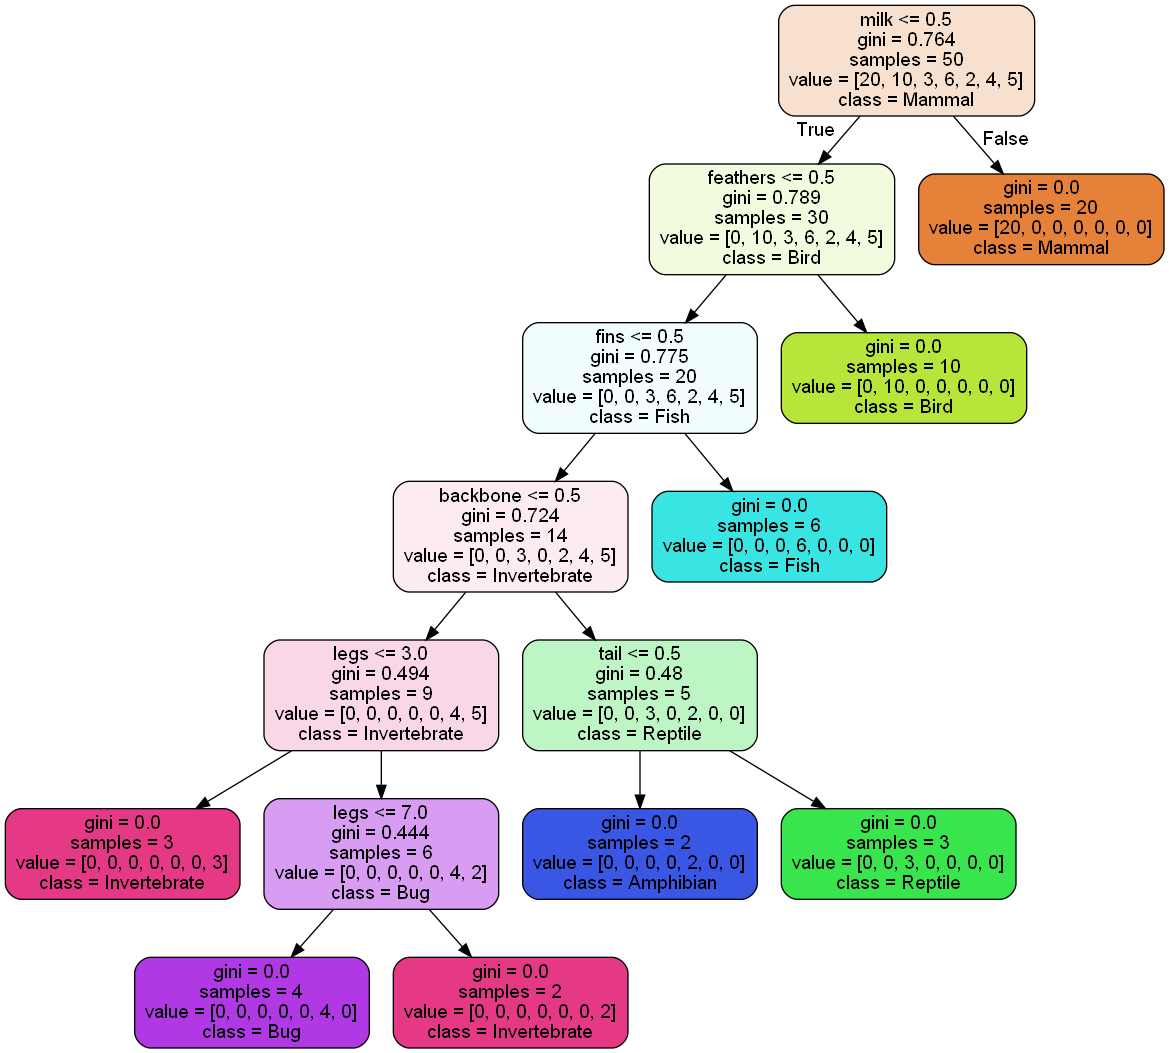

In [30]:
tree = decisionTree2

dot_data = export_graphviz(tree,
                           filled=True, 
                           rounded=True,
                           class_names=class_dataset["Class_Type"],
                           feature_names=X2.columns,
                           out_file=None) 

graph = graph_from_dot_data(dot_data) 

Image(graph.create_png())

<h1>IV. RANDOM FOREST<h1>

In [31]:
from sklearn.ensemble import RandomForestClassifier
#name of model is: randomForest

randomForest = RandomForestClassifier(n_estimators=40)
randomForest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=40)

In [32]:
randomForest.score(X_test, y_test)

0.9803921568627451

In [33]:
y_predicted = randomForest.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[21,  0,  0,  0,  0,  0,  0],
       [ 0, 10,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  1,  0,  0,  0],
       [ 0,  0,  0,  7,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0,  4,  0],
       [ 0,  0,  0,  0,  0,  0,  5]], dtype=int64)

Text(69.0, 0.5, 'Truth')

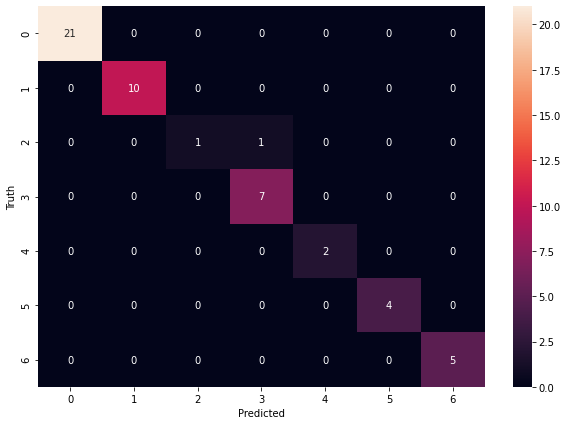

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Best Score =  0.9803921568627451
Best n_estimators =  50


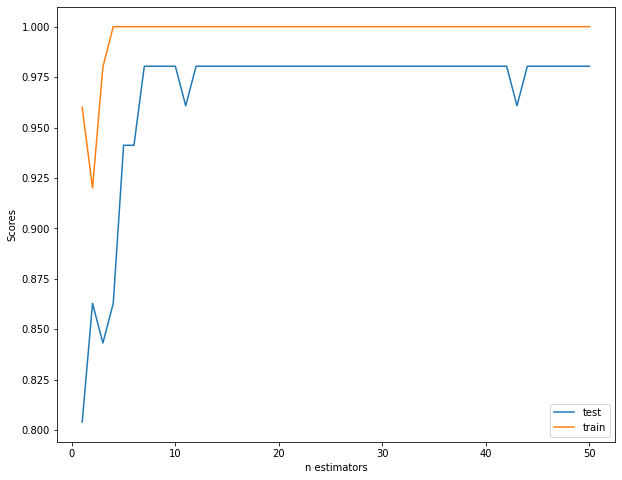

In [36]:
s_max = 0
rf_train_score_list = []
rf_test_score_list = []
for i in range(1,X_train.shape[0]+1):
    rf = RandomForestClassifier(n_estimators = i,random_state = 42)
    rf.fit(X_train,y_train)
    test_score = rf.score(X_test,y_test)
    rf_test_score_list.append(test_score)
    train_score = rf.score(X_train,y_train)
    rf_train_score_list.append(train_score)
    if test_score >= s_max :
        s_max = test_score
        index = i

print("Best Score = ",s_max)
print("Best n_estimators = ",index)

plt.figure(figsize = (10,8))
plt.plot(range(1,X_train.shape[0]+1),rf_test_score_list,label = "test")
plt.plot(range(1,X_train.shape[0]+1),rf_train_score_list,label = "train")
plt.legend()
plt.xlabel("n estimators")
plt.ylabel("Scores")
plt.show()

<h1>V. K-NEAREST NEIGHBORS<h1>

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [38]:
y_pred = knn.predict(X_test)

In [39]:
print(confusion_matrix(y_test,y_pred))

[[20  0  0  1  0  0  0]
 [ 0 10  0  0  0  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  0  7  0  0  0]
 [ 0  0  2  0  0  0  0]
 [ 0  0  0  0  0  4  0]
 [ 0  0  1  0  1  2  1]]


In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      0.95      0.98        21
           2       1.00      1.00      1.00        10
           3       0.00      0.00      0.00         2
           4       0.70      1.00      0.82         7
           5       0.00      0.00      0.00         2
           6       0.67      1.00      0.80         4
           7       1.00      0.20      0.33         5

    accuracy                           0.82        51
   macro avg       0.62      0.59      0.56        51
weighted avg       0.85      0.82      0.81        51



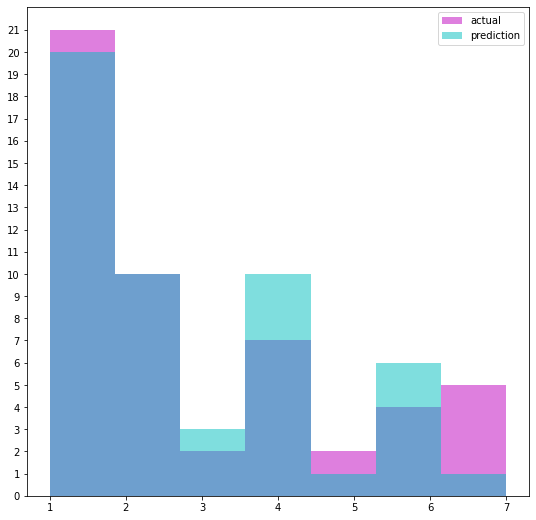

In [41]:
plt.rcParams['figure.figsize'] = (9,9) 
_, ax = plt.subplots()
ax.hist(y_test, color = 'm', alpha = 0.5, label = 'actual', bins=7)
ax.hist(y_pred, color = 'c', alpha = 0.5, label = 'prediction', bins=7)
ax.yaxis.set_ticks(np.arange(0,22))
ax.legend(loc = 'best')
plt.show()

In [42]:
k_list = np.arange(1, 50, 2)
mean_scores = []
accuracy_list = []
error_rate = []

for i in k_list:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    score = cross_val_score(knn,X_train, y_train,cv=10)
    mean_scores.append(np.mean(score))
    error_rate.append(np.mean(pred_i != y_test))

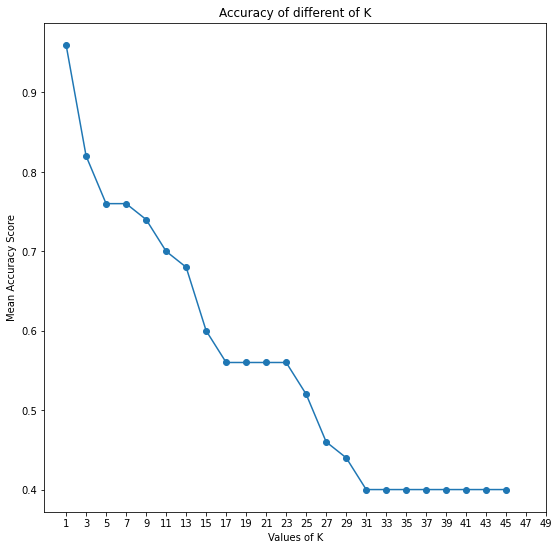

In [43]:
#visualize when using different value of n
plt.plot(k_list,mean_scores, marker='o')
plt.title('Accuracy of different of K')
plt.xlabel("Values of K")
plt.ylabel("Mean Accuracy Score")
plt.xticks(k_list)
plt.rcParams['figure.figsize'] = (12,12) 

plt.show()

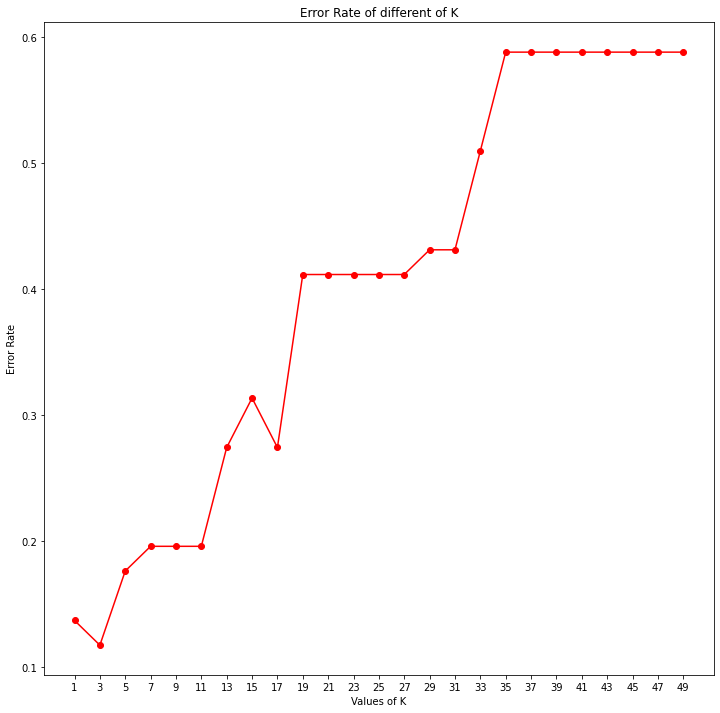

In [44]:
plt.plot(k_list,error_rate, color='r', marker = 'o')
plt.title('Error Rate of different of K')
plt.xlabel("Values of K")
plt.ylabel("Error Rate")
plt.xticks(k_list)
plt.rcParams['figure.figsize'] = (12,12) 

plt.show()

In [45]:
dataset_temp = dataset
dataset_temp['has_legs'] = np.where(dataset_temp['legs']>0,1,0)
dataset_temp.describe

<bound method NDFrame.describe of     animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0      aardvark     1         0     0     1         0        0         1   
1      antelope     1         0     0     1         0        0         0   
2          bass     0         0     1     0         0        1         1   
3          bear     1         0     0     1         0        0         1   
4          boar     1         0     0     1         0        0         1   
..          ...   ...       ...   ...   ...       ...      ...       ...   
96      wallaby     1         0     0     1         0        0         0   
97         wasp     1         0     1     0         1        0         0   
98         wolf     1         0     0     1         0        0         1   
99         worm     0         0     1     0         0        0         0   
100        wren     0         1     1     0         1        0         0   

     toothed  backbone  breathes  venomous  fins  leg

In [46]:
feature = ['hair','feathers','eggs','milk','airborne','aquatic','predator','toothed',
                 'backbone','breathes','venomous','fins','has_legs','tail','domestic']
X2 = dataset_temp[feature]
y2 = dataset_temp['class_type']

In [47]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,random_state = 0)

In [48]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [49]:
y_pred = knn.predict(X_test)

In [50]:
print(confusion_matrix(y_test,y_pred))

[[20  0  0  1  0  0  0]
 [ 0 10  0  0  0  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  0  7  0  0  0]
 [ 0  0  2  0  0  0  0]
 [ 0  0  0  0  0  4  0]
 [ 0  0  1  0  1  2  1]]


In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      0.95      0.98        21
           2       1.00      1.00      1.00        10
           3       0.00      0.00      0.00         2
           4       0.70      1.00      0.82         7
           5       0.00      0.00      0.00         2
           6       0.67      1.00      0.80         4
           7       1.00      0.20      0.33         5

    accuracy                           0.82        51
   macro avg       0.62      0.59      0.56        51
weighted avg       0.85      0.82      0.81        51



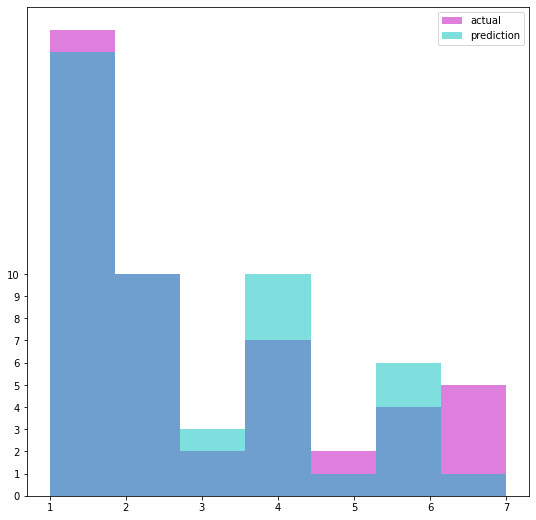

In [52]:
plt.rcParams['figure.figsize'] = (9,9) 
_, ax = plt.subplots()
ax.hist(y_test, color = 'm', alpha = 0.5, label = 'actual', bins=7)
ax.hist(y_pred, color = 'c', alpha = 0.5, label = 'prediction', bins=7)
ax.yaxis.set_ticks(np.arange(0,11))
ax.legend(loc = 'best')
plt.show()

In [53]:
k_list = np.arange(1, 50, 2)
mean_scores2 = []
accuracy_list2 = []
error_rate2 = []

for i in k_list:
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(X2_train,y2_train)
    pred_i = knn2.predict(X2_test)
    score = cross_val_score(knn2,X2_train, y2_train,cv=10)
    mean_scores2.append(np.mean(score))
    error_rate2.append(np.mean(pred_i != y2_test))

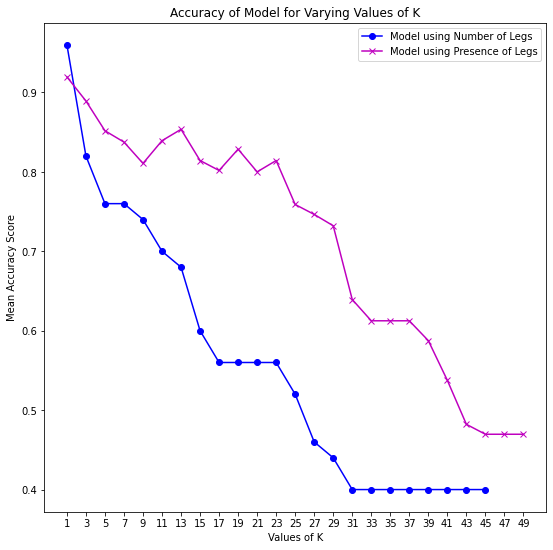

In [54]:
plt.plot(k_list,mean_scores, color='b',marker='o', label='Model using Number of Legs')
plt.plot(k_list,mean_scores2, color='m',marker='x', label='Model using Presence of Legs')

plt.title('Accuracy of Model for Varying Values of K')
plt.xlabel("Values of K")
plt.ylabel("Mean Accuracy Score")
plt.xticks(k_list)
plt.legend()
plt.rcParams['figure.figsize'] = (12,12) 

plt.show()

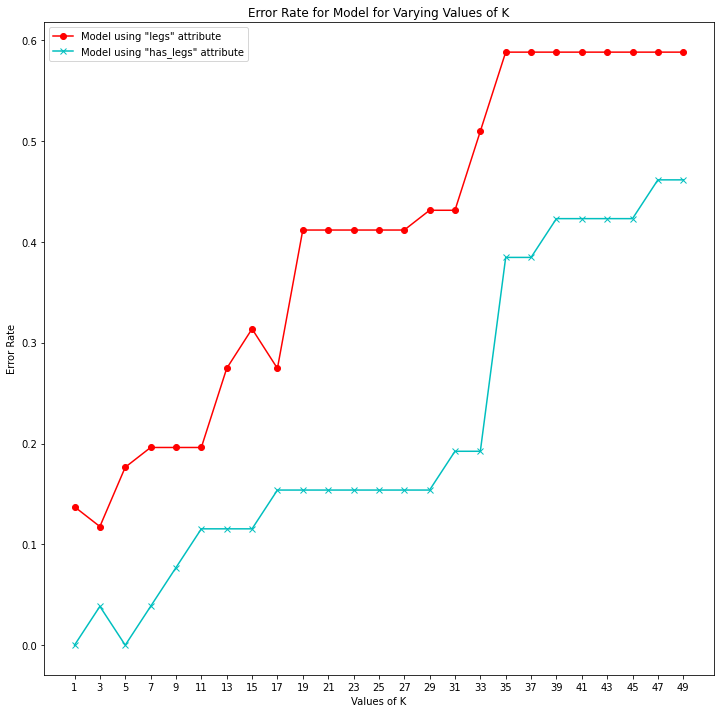

In [55]:
plt.plot(k_list,error_rate, color='r', marker = 'o', label='Model using "legs" attribute')
plt.plot(k_list,error_rate2, color='c', marker = 'x', label='Model using "has_legs" attribute')

plt.title('Error Rate for Model for Varying Values of K')
plt.xlabel("Values of K")
plt.ylabel("Error Rate")
plt.xticks(k_list)
plt.legend()
plt.rcParams['figure.figsize'] = (12,12) 

plt.show()

<h1>VI. SUPPORT VECTOR MACHINE<h1>

In [56]:
from sklearn.svm import SVC
#declare model
svm = SVC(kernel = 'linear', C = 1e5)
#fit model
svm.fit(X_train, y_train)

SVC(C=100000.0, kernel='linear')

In [57]:
#check accuracy:
y_pred_svm = svm.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred_svm, y_test)
print(accuracy)

0.9411764705882353


<h1>VII. NAIVE-BAYES CLASSIFICATION<h1>


In [58]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred_nb = nb.predict(X_test)
print("Test Accurary : ",nb.score(X_test,y_test))
print("Train Accurary : ",nb.score(X_train,y_train))

Test Accurary :  0.9803921568627451
Train Accurary :  1.0


In [59]:
from sklearn.metrics import confusion_matrix, classification_report
cm_nb = confusion_matrix(y_test,y_pred_nb)
cr_nb = classification_report(y_test,y_pred_nb)
print("confusion matrix : \n",cm_nb)
print("classification report : \n",cr_nb)

confusion matrix : 
 [[21  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0]
 [ 0  0  1  1  0  0  0]
 [ 0  0  0  7  0  0  0]
 [ 0  0  0  0  2  0  0]
 [ 0  0  0  0  0  4  0]
 [ 0  0  0  0  0  0  5]]
classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        10
           3       1.00      0.50      0.67         2
           4       0.88      1.00      0.93         7
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         5

    accuracy                           0.98        51
   macro avg       0.98      0.93      0.94        51
weighted avg       0.98      0.98      0.98        51



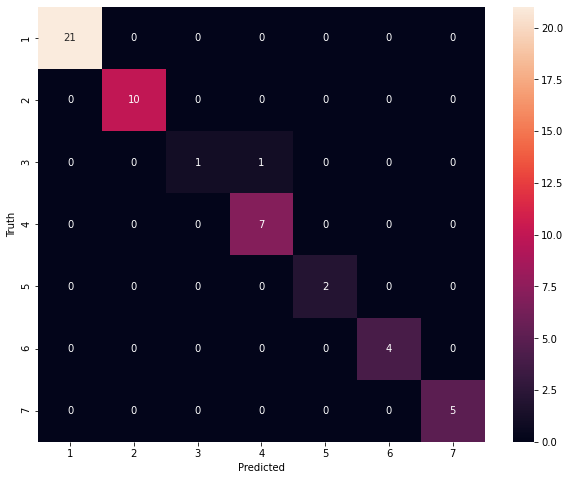

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,8))
sn.heatmap(cm_nb,annot = True,xticklabels = np.arange(1,8),yticklabels = np.arange(1,8))
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()